# Standardization

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (20, 9)
pd.set_option('display.max_columns', 500)

In [1]:
17 / 25000

0.00068

In [2]:
transactions = pd.read_csv('onlinefraud_with_features.csv')
transactions.head()

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,has_debt,debt,origins_count,min_amount,max_amount,std_amount,median_amount,mean_amount,min_oldbalanceOrg,max_oldbalanceOrg,std_oldbalanceOrg,median_oldbalanceOrg,mean_oldbalanceOrg,min_newbalanceOrig,max_newbalanceOrig,std_newbalanceOrig,median_newbalanceOrig,mean_newbalanceOrig,min_oldbalanceDest,max_oldbalanceDest,std_oldbalanceDest,median_oldbalanceDest,mean_oldbalanceDest,min_newbalanceDest,max_newbalanceDest,std_newbalanceDest,median_newbalanceDest,mean_newbalanceDest,min_step,max_step,std_step,median_step,mean_step,min_has_debt,max_has_debt,std_has_debt,median_has_debt,mean_has_debt,nameDestFirstLetter,amount_has_cents,amount_has_units,amount_has_tens,amount_has_hundreds,amount_is_equal_to_balance,type_code,type=PAYMENT,type=TRANSFER,type=CASH_IN,type=CASH_OUT,nameDestFirstLetter_code,nameDestFirstLetter=M
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,False,-0.00,1,9839.64,9839.64,0.000000,9839.640,9839.640000,170136.0,170136.00,0.000000e+00,170136.0,1.701360e+05,160296.36,160296.36,0.000000e+00,160296.36,1.602964e+05,0.0,0.00,0.000000e+00,0.00,0.000000e+00,0.0,0.00,0.000000e+00,0.00,0.000000e+00,1,1,0.000000,1.0,1.000000,False,False,0.000000,0.0,0.000000,M,True,True,True,True,False,3,True,False,False,False,1,True
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,False,-0.00,1,1864.28,1864.28,0.000000,1864.280,1864.280000,21249.0,21249.00,0.000000e+00,21249.0,2.124900e+04,19384.72,19384.72,0.000000e+00,19384.72,1.938472e+04,0.0,0.00,0.000000e+00,0.00,0.000000e+00,0.0,0.00,0.000000e+00,0.00,0.000000e+00,1,1,0.000000,1.0,1.000000,False,False,0.000000,0.0,0.000000,M,True,True,True,True,False,3,True,False,False,False,1,True
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,False,0.00,44,181.00,1447322.21,252655.757617,139366.105,225517.832045,0.0,21782433.66,5.109399e+06,10170.5,1.915190e+06,0.00,22012047.86,5.160588e+06,0.00,1.971241e+06,0.0,4115621.95,1.311491e+06,2820318.13,2.455461e+06,0.0,4115621.95,1.279824e+06,2820318.13,2.534052e+06,1,400,130.627992,41.5,118.954545,False,True,0.461522,1.0,0.704545,C,False,True,True,True,True,4,False,True,False,False,0,False
3,6,109985.65,41851.00,0.00,C553264065,0.00,109985.65,0,True,68134.65,44,181.00,1447322.21,252655.757617,139366.105,225517.832045,0.0,21782433.66,5.109399e+06,10170.5,1.915190e+06,0.00,22012047.86,5.160588e+06,0.00,1.971241e+06,0.0,4115621.95,1.311491e+06,2820318.13,2.455461e+06,0.0,4115621.95,1.279824e+06,2820318.13,2.534052e+06,1,400,130.627992,41.5,118.954545,False,True,0.461522,1.0,0.704545,C,True,True,True,True,False,4,False,True,False,False,0,False
4,7,10256.20,3766080.24,3776336.45,C553264065,109985.65,99729.44,0,False,-0.00,44,181.00,1447322.21,252655.757617,139366.105,225517.832045,0.0,21782433.66,5.109399e+06,10170.5,1.915190e+06,0.00,22012047.86,5.160588e+06,0.00,1.971241e+06,0.0,4115621.95,1.311491e+06,2820318.13,2.455461e+06,0.0,4115621.95,1.279824e+06,2820318.13,2.534052e+06,1,400,130.627992,41.5,118.954545,False,True,0.461522,1.0,0.704545,C,True,True,True,True,False,0,False,False,True,False,0,False


In [3]:
transactions['nameDestFirstLetterIsM'] = transactions['nameDestFirstLetter'] == 'M'
transactions.drop(columns=['nameDestFirstLetter'], inplace=True)

## Split data into train, test and validation sets

In [4]:
train_size = 0.5
test_size = 0.2
validation_size = 0.3
assert train_size + test_size + validation_size == 1

target_column = 'isFraud'
X = transactions.drop(columns=target_column)
y = transactions[target_column]

random_state = 42

datasets = {}

### Common split

In this case we just split data with respect to labels to keep the same positive and negative classes balance in sets.

In [5]:
def add_common_splitted_data(X, y, key='common'):
    X_train, X_remaining, y_train, y_remaining = train_test_split(
        X,
        y,
        train_size=train_size,
        random_state=random_state,
        stratify=y
    )

    X_validation, X_test, y_validation, y_test = train_test_split(
        X_remaining,
        y_remaining,
        test_size=test_size / (test_size + validation_size),
        stratify=y_remaining
    )

    datasets[key] = {
        'X': {
            'train': X_train,
            'test': X_test,
            'validation': X_validation
        },
        'y': {
            'train': y_train,
            'test': y_test,
            'validation': y_validation
        }
    }


add_common_splitted_data(X, y)

### Group split

We use this split to keep all data with the same destination name in one set, to prevent data leak.

In [6]:
round(y.mean(), 5)

0.00129

In [7]:
round(transactions.groupby('nameDest')[target_column].mean().apply(lambda value: int(value * 2) - int(value)).mean(), 5)

0.00126

As we can see, if we group data by nameDest and define class label as label of the major part of the group, we will receive the same balance of classes.

In [8]:
def train_test_split_group(*arrays, **kwargs):
    group_name = kwargs.get('group_name')
    if group_name is None:
        return train_test_split_group(*arrays, **kwargs)
    else:
        del kwargs['group_name']

    X = arrays[0]
    Y = arrays[1]
    data = pd.concat([X, Y], axis=1)
    # define label of group as average of labels of this group, rounded to integer, according to math rules (<0.5 -> 0, >=0.5 -> 1)
    grouped_data = data.groupby(group_name)[target_column].mean().apply(lambda value: int(value * 2) - int(value)).reset_index()
    x = grouped_data[[group_name]]
    y = grouped_data[target_column]
    groups_train, _, _, _ = train_test_split(
        x,
        y,
        stratify=y,
        **kwargs
    )
    train_index = X[group_name].isin(groups_train[group_name].tolist())
    test_index = ~train_index

    X_train = X[train_index]
    y_train = Y[train_index]

    X_test = X[test_index]
    y_test = Y[test_index]

    return X_train, X_test, y_train, y_test

In [9]:
def add_group_splitted_data(X, y, key='group'):
    X_train, X_remaining, y_train, y_remaining = train_test_split_group(X, y, group_name='nameDest', train_size=train_size)
    X_validation, X_test, y_validation, y_test = train_test_split_group(
        X_remaining,
        y_remaining,
        group_name='nameDest',
        test_size=test_size / (test_size + validation_size)
    )

    datasets[key] = {
        'X': {
            'train': X_train,
            'test': X_test,
            'validation': X_validation
        },
        'y': {
            'train': y_train,
            'test': y_test,
            'validation': y_validation
        }
    }
    return X_train, X_test, X_validation, y_train, y_test, y_validation

In [10]:
X_train, X_test, X_validation, y_train, y_test, y_validation = add_group_splitted_data(X, y)

In [11]:
y_train_mean = round(y_train.mean(), 5)
y_test_mean = round(y_test.mean(), 5)
print(f'{y_train_mean=}\t{y_test_mean=}')

y_train_mean=0.00128	y_test_mean=0.00128


In [12]:
pd.merge(
    left=X_train,
    right=X_test,
    on='nameDest'
)

,step_x,amount_x,oldbalanceOrg_x,newbalanceOrig_x,nameDest,oldbalanceDest_x,newbalanceDest_x,has_debt_x,debt_x,origins_count_x,min_amount_x,max_amount_x,std_amount_x,median_amount_x,mean_amount_x,min_oldbalanceOrg_x,max_oldbalanceOrg_x,std_oldbalanceOrg_x,median_oldbalanceOrg_x,mean_oldbalanceOrg_x,min_newbalanceOrig_x,max_newbalanceOrig_x,std_newbalanceOrig_x,median_newbalanceOrig_x,mean_newbalanceOrig_x,min_oldbalanceDest_x,max_oldbalanceDest_x,std_oldbalanceDest_x,median_oldbalanceDest_x,mean_oldbalanceDest_x,min_newbalanceDest_x,max_newbalanceDest_x,std_newbalanceDest_x,median_newbalanceDest_x,mean_newbalanceDest_x,min_step_x,max_step_x,std_step_x,median_step_x,mean_step_x,min_has_debt_x,max_has_debt_x,std_has_debt_x,median_has_debt_x,mean_has_debt_x,amount_has_cents_x,amount_has_units_x,amount_has_tens_x,amount_has_hundreds_x,amount_is_equal_to_balance_x,type_code_x,type=PAYMENT_x,type=TRANSFER_x,type=CASH_IN_x,type=CASH_OUT_x,nameDestFirstLetter_code_x,nameDestFirstLetter=M_x,nameDestFirstLetterIsM_x,step_y,amount_y,oldbalanceOrg_y,newbalanceOrig_y,oldbalanceDest_y,newbalanceDest_y,has_debt_y,debt_y,origins_count_y,min_amount_y,max_amount_y,std_amount_y,median_amount_y,mean_amount_y,min_oldbalanceOrg_y,max_oldbalanceOrg_y,std_oldbalanceOrg_y,median_oldbalanceOrg_y,mean_oldbalanceOrg_y,min_newbalanceOrig_y,max_newbalanceOrig_y,std_newbalanceOrig_y,median_newbalanceOrig_y,mean_newbalanceOrig_y,min_oldbalanceDest_y,max_oldbalanceDest_y,std_oldbalanceDest_y,median_oldbalanceDest_y,mean_oldbalanceDest_y,min_newbalanceDest_y,max_newbalanceDest_y,std_newbalanceDest_y,median_newbalanceDest_y,mean_newbalanceDest_y,min_step_y,max_step_y,std_step_y,median_step_y,mean_step_y,min_has_debt_y,max_has_debt_y,std_has_debt_y,median_has_debt_y,mean_has_debt_y,amount_has_cents_y,amount_has_units_y,amount_has_tens_y,amount_has_hundreds_y,amount_is_equal_to_balance_y,type_code_y,type=PAYMENT_y,type=TRANSFER_y,type=CASH_IN_y,type=CASH_OUT_y,nameDestFirstLetter_code_y,nameDestFirstLetter=M_y,nameDestFirstLetterIsM_y


Our split allowed us to keep the same balance of classes in sets, and also keep all transactions of one recipient in one set to avoid data leek

### Split only types of interest

Not each type of transaction has fraud transactions. Let's simplify data for model and remove types of transactions which doesn't have fraud.

In [13]:
transactions_of_interest = transactions[transactions['type=TRANSFER'] | transactions['type=CASH_OUT']]
X = transactions_of_interest.drop(columns=target_column)
y = transactions_of_interest[target_column]
add_common_splitted_data(X, y, 'common_main_types')
_ = add_group_splitted_data(X, y, 'group_main_types')

In [14]:
datasets.keys()

dict_keys(['common', 'group', 'common_main_types', 'group_main_types'])

In [15]:
for dataset_name, dataset in datasets.items():
    print(dataset_name)
    for set_type in ['train', 'test', 'validation']:
        print()
        print(set_type)
        print(f"{dataset['X'][set_type].shape=}\t{dataset['y'][set_type].shape=}")
    print('\n')

common

train
dataset['X'][set_type].shape=(3181310, 58)	dataset['y'][set_type].shape=(3181310,)

test
dataset['X'][set_type].shape=(1272524, 58)	dataset['y'][set_type].shape=(1272524,)

validation
dataset['X'][set_type].shape=(1908786, 58)	dataset['y'][set_type].shape=(1908786,)


group

train
dataset['X'][set_type].shape=(3178830, 58)	dataset['y'][set_type].shape=(3178830,)

test
dataset['X'][set_type].shape=(1276251, 58)	dataset['y'][set_type].shape=(1276251,)

validation
dataset['X'][set_type].shape=(1907539, 58)	dataset['y'][set_type].shape=(1907539,)


common_main_types

train
dataset['X'][set_type].shape=(1385204, 58)	dataset['y'][set_type].shape=(1385204,)

test
dataset['X'][set_type].shape=(554082, 58)	dataset['y'][set_type].shape=(554082,)

validation
dataset['X'][set_type].shape=(831123, 58)	dataset['y'][set_type].shape=(831123,)


group_main_types

train
dataset['X'][set_type].shape=(1385977, 58)	dataset['y'][set_type].shape=(1385977,)

test
dataset['X'][set_type].shape=(55

### Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
import os
from tqdm import tqdm

columns_to_drop = ['nameDest']
for dataset_name, dataset in tqdm(datasets.items()):
    X = dataset['X']
    y = dataset['y']

    scaler = StandardScaler()

    columns = X['train'].drop(columns=columns_to_drop).columns
    train = scaler.fit_transform(X['train'].drop(columns=columns_to_drop))
    test = scaler.transform(X['test'].drop(columns=columns_to_drop))
    validation = scaler.transform(X['validation'].drop(columns=columns_to_drop))

    X['train'] = pd.DataFrame(train, columns=columns)
    X['test'] = pd.DataFrame(test, columns=columns)
    X['validation'] = pd.DataFrame(validation, columns=columns)

    del train
    del test
    del validation

    for key, value in tqdm(X.items()):
        dir_name = 'data'
        if not os.path.isdir(dir_name):
            os.mkdir(dir_name)
        value.to_csv(f'./{dir_name}/x_{dataset_name}_{key}.csv', index=False)
        y[key].to_csv(f'./{dir_name}/y_{dataset_name}_{key}.csv', index=False)

  0%|          | 0/4 [01:18<?, ?it/s]


KeyboardInterrupt: 

In [4]:
try:
    data = datasets['group_main_types']
    X = data['X']
    y = data['y']

    X_train, X_test, X_validation = X['train'], X['test'], X['validation']
    y_train, y_test, y_validation = y['train'], y['test'], y['validation']

    del datasets
    del transactions
except:
    X_train = pd.read_csv('./data/x_group_main_types_train.csv')
    X_test = pd.read_csv('./data/x_group_main_types_test.csv')
    X_validation = pd.read_csv('./data/x_group_main_types_validation.csv')

    y_train = pd.read_csv('./data/y_group_main_types_train.csv')
    y_test = pd.read_csv('./data/y_group_main_types_test.csv')
    y_validation = pd.read_csv('./data/y_group_main_types_validation.csv')


# Dimensionality reduction

Let's reduce number of dimensions to achieve better results

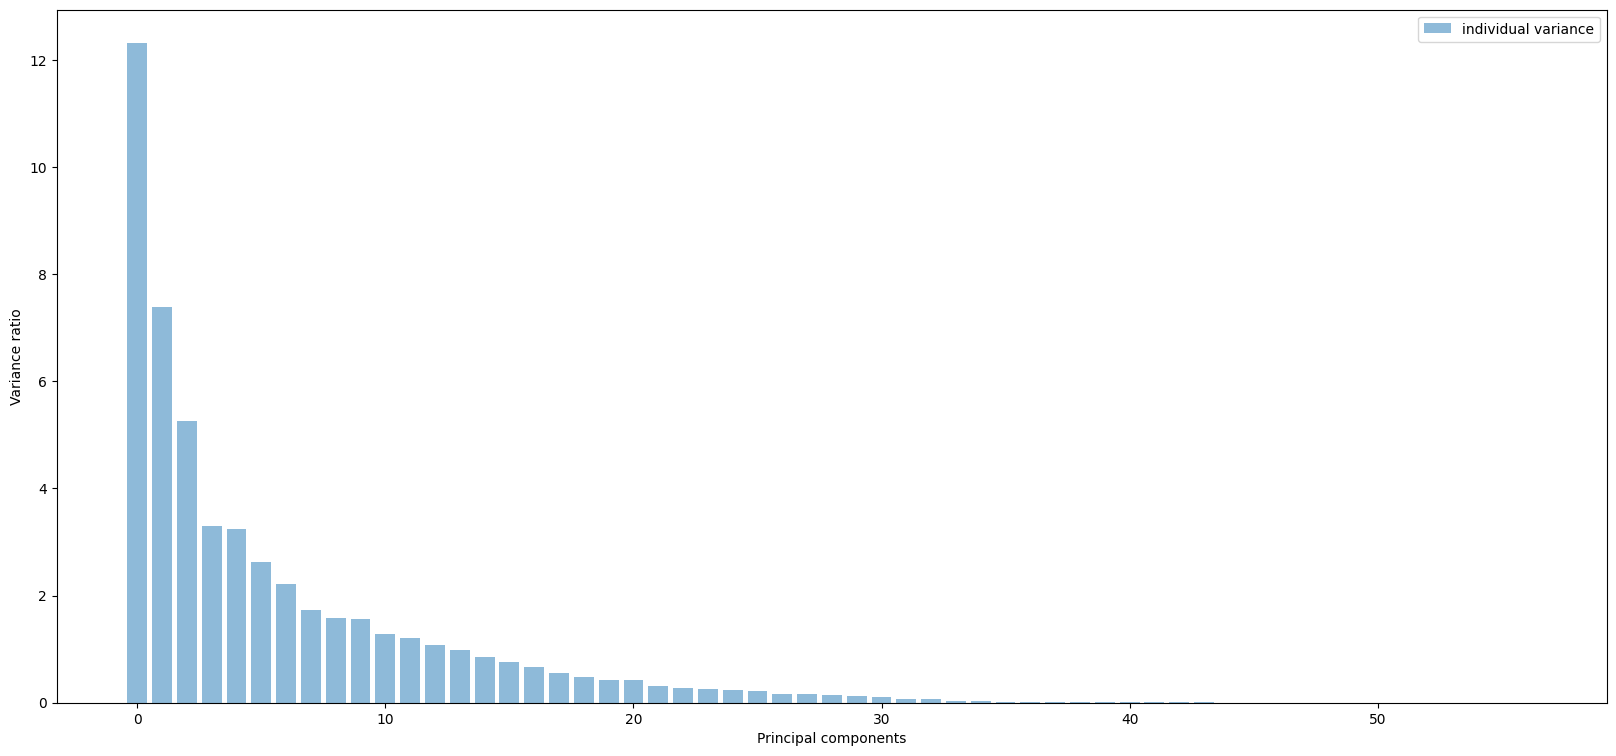

In [3]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_validation)
pca_variance = pca.explained_variance_

plt.bar(range(X_validation.shape[1]), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

As we can see, about 20 features are the most informative according to PCA. But we want to keep data easy to interpret, so let's choose other methods for dimensionality reduciton.

Let's train some model with high predictive ability and choose the most important variables.

In [ ]:
from catboost import CatBoostClassifier
import numpy as np
from sklearn.metrics import accuracy_score


def rounded_accuracy_score(*args, n_digits=6, **kwargs):
    if 'n_digits' in kwargs:
        del kwargs['n_digits']
    return round(accuracy_score(*args, **kwargs), n_digits)


model = CatBoostClassifier()
model.fit(X_train, y_train)

y_pred_catboost = model.predict(X_validation)
stupid_y_pred = np.zeros_like(y_validation)

accuracy = rounded_accuracy_score(
    y_true=y_validation,
    y_pred=y_pred_catboost
)
baseline_accuracy = rounded_accuracy_score(
    y_true=y_validation,
    y_pred=stupid_y_pred
)

print(f'{accuracy=}, {baseline_accuracy=}')

In [9]:
y_pred_catboost = model.predict(X_test)
stupid_y_pred = np.zeros_like(y_test)
from sklearn.metrics import confusion_matrix

print(f'{accuracy_score(y_test, y_pred_catboost)=}')
confusion_matrix(y_test, y_pred_catboost)

accuracy_score(y_test, y_pred_catboost)=0.9999892066918511


array([[554256,      0],
       [     6,   1638]])

As we can see, our model has very high accuracy, but it is not very informative, because baseline model which predict always false label demonstrates also very high accuracy. Let's try other metrics to deal with unbalanced classes.

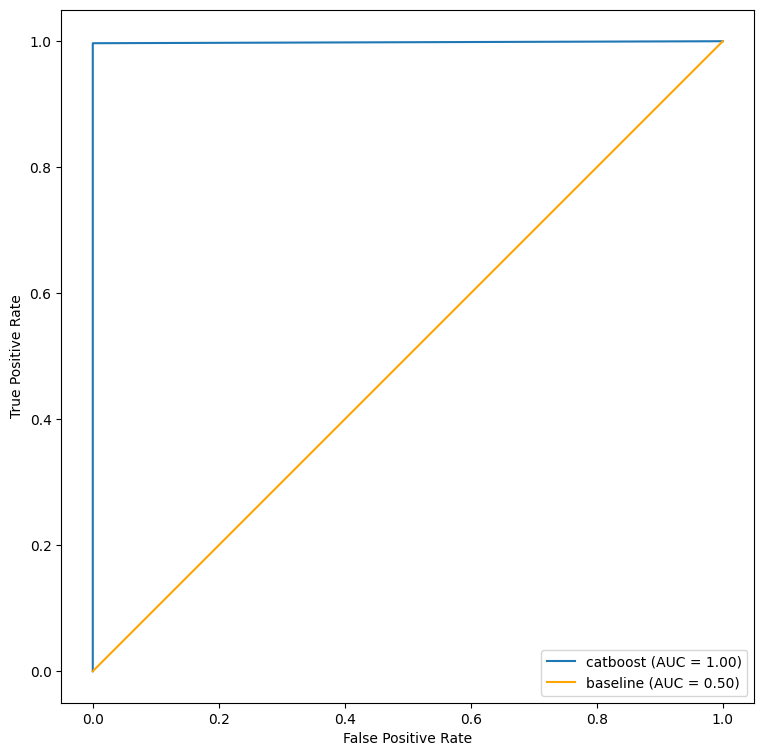

In [6]:
from sklearn.metrics import RocCurveDisplay, precision_score, recall_score, matthews_corrcoef, confusion_matrix

ax = plt.axes()
RocCurveDisplay.from_predictions(
    y_true=y_validation,
    y_pred=y_pred_catboost,
    name='catboost',
    ax=ax
)

RocCurveDisplay.from_predictions(
    y_true=y_validation,
    y_pred=stupid_y_pred,
    name='baseline',
    color='orange',
    ax=ax
)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [7]:
rounder = lambda value, digits=5: round(value, digits)
for metric_score in [accuracy_score, precision_score, recall_score, matthews_corrcoef]:
    print(f'{metric_score.__name__}:')
    for y_pred, model_name in zip([y_pred_catboost, stupid_y_pred], ['catboost', 'always_negative_model']):
        metric_value = metric_score(
            y_true=y_validation,
            y_pred=y_pred
        )
        metric_value = rounder(metric_value)
        print(f'\t{model_name}: {metric_value}')


accuracy_score:
	catboost: 0.99999
	always_negative_model: 0.99696
precision_score:
	catboost: 1.0
	always_negative_model: 0.0
recall_score:


/home/demidov-artem/PycharmProjects/CVTDM_Fraud_Prediction/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	catboost: 0.99683
	always_negative_model: 0.0
matthews_corrcoef:
	catboost: 0.99841
	always_negative_model: 0.0


As we can see, all metrics, except accuracy, allowed to beat baseline model and demonstrate its failure

In [8]:
from IPython.display import display

print('confusion matrix:')
for y_pred, model_name in zip([y_pred_catboost, stupid_y_pred], ['catboost', 'always_negative_model']):
    metric_value = confusion_matrix(
        y_true=y_validation,
        y_pred=y_pred
    )
    print(f'\t{model_name}')
    display(metric_value)
    display(np.round(metric_value / np.trace(metric_value), 6))

confusion matrix:
	catboost


array([[827905,      0],
       [     8,   2514]])

array([[9.96973e-01, 0.00000e+00],
       [1.00000e-05, 3.02700e-03]])

	always_negative_model


array([[827905,      0],
       [  2522,      0]])

array([[1.      , 0.      ],
       [0.003046, 0.      ]])

In [11]:
def get_importance_table(model, used_features=None):
    if used_features is None:
        used_features = X_validation.columns
    importance = pd.DataFrame(model.get_feature_importance(), columns=['importance'])
    importance['columns'] = used_features
    importance = importance.sort_values(by='importance', ascending=False).reset_index(drop=True)
    return importance


In [10]:
importance = get_importance_table(model)
importance

,importance,columns
0,15.650794,step
1,7.906781,oldbalanceOrg
2,6.484236,amount_is_equal_to_balance
3,5.339662,newbalanceDest
4,5.214445,oldbalanceDest
5,4.661854,std_oldbalanceOrg
6,4.355724,max_oldbalanceOrg
7,3.734070,debt
8,3.587980,amount
9,2.779926,mean_newbalanceOrig


In [11]:
top_features = importance.head(20)['columns'].tolist()

In [ ]:
model_20 = CatBoostClassifier()
model_20.fit(X_train[top_features], y_train)

y_pred_catboost = model_20.predict(X_validation[top_features])
stupid_y_pred = np.zeros_like(y_validation)

accuracy = rounded_accuracy_score(
    y_true=y_validation,
    y_pred=y_pred_catboost
)
baseline_accuracy = rounded_accuracy_score(
    y_true=y_validation,
    y_pred=stupid_y_pred
)

In [11]:
print(f'{accuracy=}, {baseline_accuracy=}')

accuracy=0.99999, baseline_accuracy=0.996963


As we can see, our model kept the same accuracy.

In [15]:
importance = get_importance_table(model_20, top_features)
importance

,importance,columns
0,10.115498,step
1,8.548715,oldbalanceOrg
2,7.887570,oldbalanceDest
3,6.966856,newbalanceDest
4,6.626446,std_oldbalanceDest
5,6.299706,std_oldbalanceOrg
6,6.116315,std_amount
7,5.947774,amount_is_equal_to_balance
8,4.911319,min_amount
9,4.712226,debt


Let's choose top-10 most important features and try test model again

In [16]:
top_10_features = importance.head(10)['columns'].tolist()

In [ ]:
model_10 = CatBoostClassifier()
model_10.fit(X_train[top_10_features], y_train)

y_pred_catboost = model_10.predict(X_validation[top_10_features])
stupid_y_pred = np.zeros_like(y_validation)

accuracy = rounded_accuracy_score(
    y_true=y_validation,
    y_pred=y_pred_catboost
)
baseline_accuracy = rounded_accuracy_score(
    y_true=y_validation,
    y_pred=stupid_y_pred
)

print(f'{accuracy=}, {baseline_accuracy=}')

In [12]:
print(f'{accuracy=}, {baseline_accuracy=}')

accuracy=0.99999, baseline_accuracy=0.996963


Accuracy is still very high, let's use backward elimination to find minimum possible number of values.

In [29]:
top_10_features

['step',
 'oldbalanceOrg',
 'oldbalanceDest',
 'newbalanceDest',
 'std_oldbalanceDest',
 'std_oldbalanceOrg',
 'std_amount',
 'amount_is_equal_to_balance',
 'min_amount',
 'debt']

In [31]:
from tqdm import trange

start_accuracy = accuracy
top_features = top_10_features

accuracies = [accuracy]
top_features_list = [top_features]

model_x = model_10

for i in trange(9):
    top_features = get_importance_table(model_x, top_features)['columns'].tolist()[:-1]
    top_features_list.append(top_features)
    model_x = CatBoostClassifier(logging_level='Silent')
    model_x.fit(X_train[top_features], y_train)

    y_pred_catboost = model_x.predict(X_validation[top_features])

    accuracy = accuracy_score(
        y_true=y_validation,
        y_pred=y_pred_catboost
    )
    accuracies.append(accuracy)


100%|██████████| 9/9 [11:34<00:00, 77.20s/it]


In [ ]:
accuracies = accuracies[::-1]

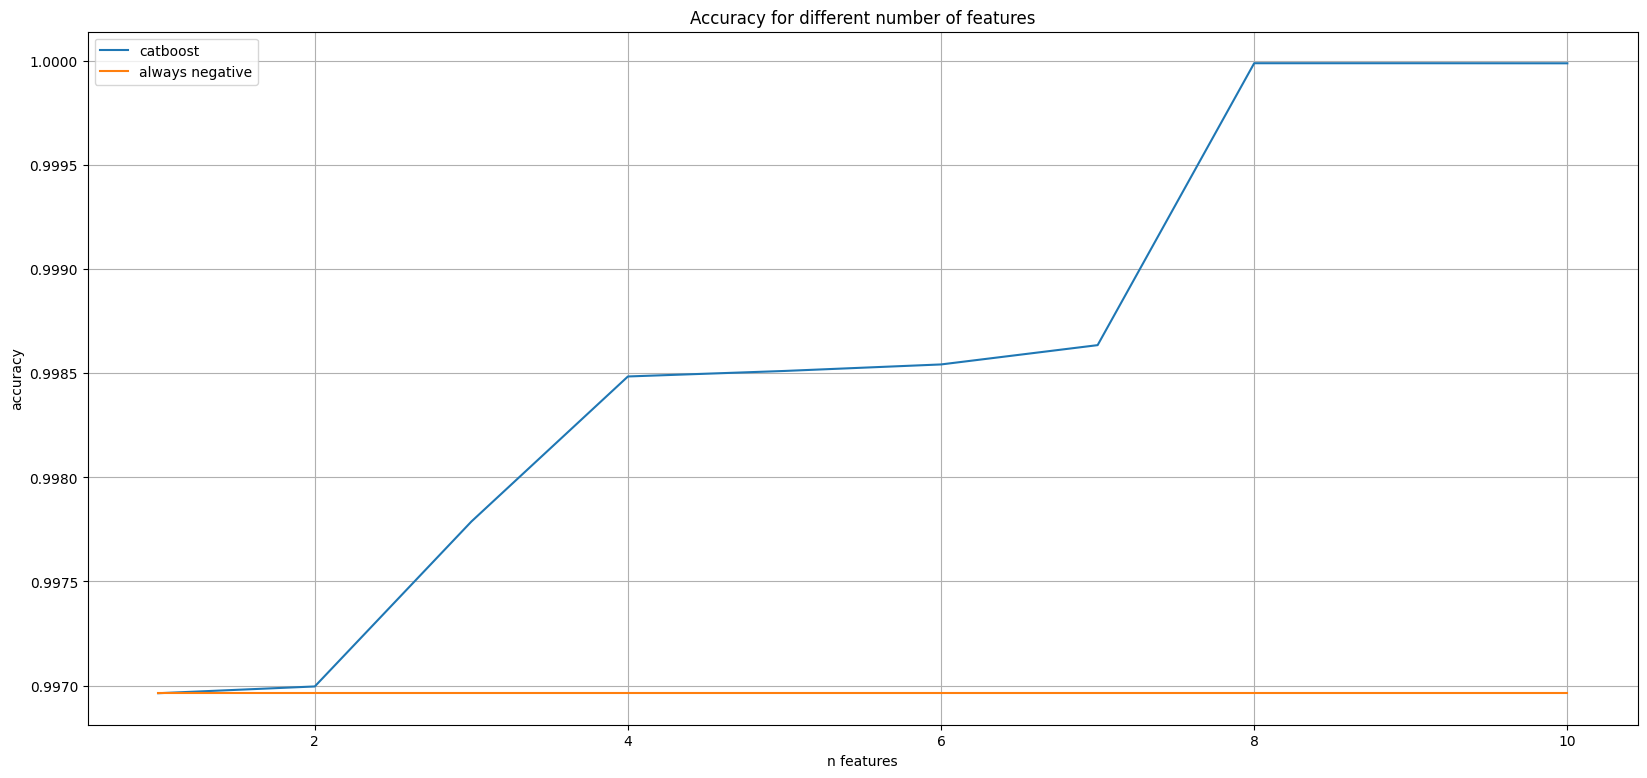

In [42]:
plt.plot(range(1, len(accuracies) + 1), accuracies, label='catboost')
plt.plot(range(1, len(accuracies) + 1), [baseline_accuracy] * len(accuracies), label='always negative')
plt.grid()
plt.title('Accuracy for different number of features')
plt.ylabel('accuracy')
plt.xlabel('n features')
plt.legend()
plt.show()

In [35]:
accuracies[7]

0.9999903664018631

In [38]:
top_features_list[2]

['oldbalanceOrg',
 'step',
 'std_amount',
 'std_oldbalanceOrg',
 'std_oldbalanceDest',
 'amount_is_equal_to_balance',
 'newbalanceDest',
 'debt']

In [17]:
naive_importances = {'oldbalanceOrg': 0.0005362399048611133,
                     'step': 7.225005454847278e-06,
                     'std_amount': 0.0005703419306081426,
                     'std_oldbalanceOrg': 4.479503382004424e-06,
                     'std_oldbalanceDest': 0.00022498666986492388,
                     'amount_is_equal_to_balance': 0.004897253197426133,
                     'newbalanceDest': 4.046003054729575e-05,
                     'debt': -0.00011603358760536864}

for value in naive_importances.values():
    print(value, end=', ')
print()
for key in naive_importances:
    print(f'"{key}"', end=', ')

print()

0.0005362399048611133, 7.225005454847278e-06, 0.0005703419306081426, 4.479503382004424e-06, 0.00022498666986492388, 0.004897253197426133, 4.046003054729575e-05, -0.00011603358760536864, 
"oldbalanceOrg", "step", "std_amount", "std_oldbalanceOrg", "std_oldbalanceDest", "amount_is_equal_to_balance", "newbalanceDest", "debt", 
